# Laplace distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import laplace
import math
%matplotlib inline

## Сгенерируем выборку объёма 1000 из распределения Лапласа


In [2]:
lapl_rv = laplace(0, 1)
sample = lapl_rv.rvs(1000)

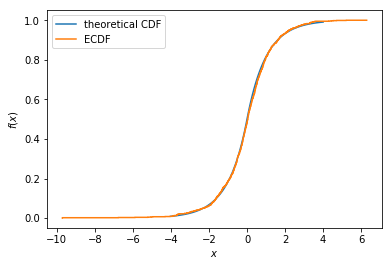

In [3]:
x = np.linspace(-4,4,100)
cdf = lapl_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

## Построем гистограмму выборки и плотность распределения

Text(0.5,0,'$x$')

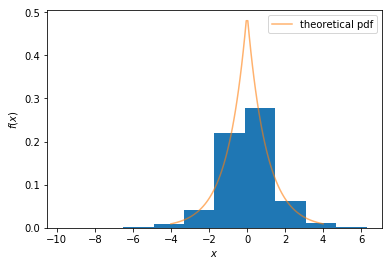

In [4]:
plt.hist(sample, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

x = np.linspace(-4,4,100)
pdf = lapl_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.6)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')


## Оценим распределение выборочного среднего нашей случайной величины при разных объёмах выборок

In [5]:
def laplaceFunction(sizeSamples, Ex, Dx):
    n = sizeSamples
    #генерация выборок
    array = np.array([lapl_rv.rvs(size=n) for x in range(1000)])
    #вычисление выборочных средних
    meanVal = array.mean(axis = 1)
    plt.hist(meanVal, normed=True, alpha=0.5, label='hist mean n ' + str(n))
    
    mu = Ex
    sigma = math.sqrt(Dx/n)
    print ('мат. ожидание = ' , mu)
    print ('sigma = ' , sigma)
    #нормальное распределенние
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(-4,4,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, 'r-', lw=3, alpha=0.7, label='laplace pdf n =' + str(n))
    plt.ylabel('samples')
    plt.xlabel('$x$')
    plt.legend(loc='best')

In [6]:
EX = lapl_rv.mean()
std = lapl_rv.std()
DX = std**2
print ('Ex = ', EX, 'DX = ', DX)

Ex =  0.0 DX =  2.0000000000000004


## n = 5

мат. ожидание =  0.0
sigma =  0.6324555320336759


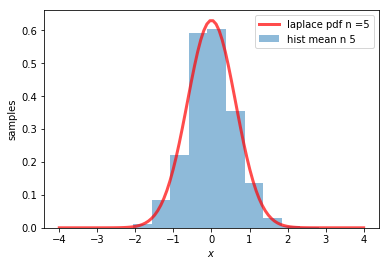

In [7]:
laplaceFunction(5, EX, DX)

## n = 10

мат. ожидание =  0.0
sigma =  0.447213595499958


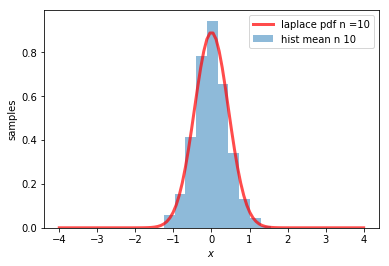

In [8]:
laplaceFunction(10, EX, DX)

## n = 15

мат. ожидание =  0.0
sigma =  0.2


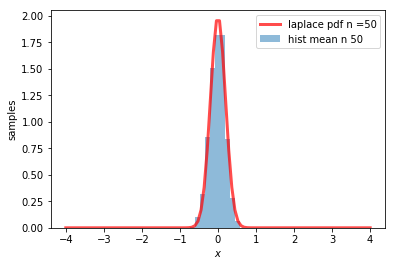

In [9]:
laplaceFunction(50, EX, DX)

### Распределение выборочных средних для функции Лапласа хорошо описывается нормальным распределением. С ростом n точность аппроксимации увеличивается.